In [26]:
# Import libraries and dependencies
from urllib.request import urlopen
import pandas as pd
import json
import os
import panel as pn
from panel.interact import interact
from panel import widgets
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import math

# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()

True

In [27]:
pn.extension()

In [28]:
#set the fmp API key
fmp_api_key = os.getenv("FMP_API")

In [29]:
# list to obtain the stock tickers for 5 companies
ticker_list = []

# Ask users to provide a list of five ticker symbols
# We can extend this to any number by asking user how many stocks he/she wants to compare

for  i in range(0, 5):
    ticker_input = input("Input Ticker Symbol # " + str(i+1))
    #TODO check if this ticker symbol is valid
    #TODO check if the symbol is already added, no duplicates allowed.
    ticker_list.append(ticker_input)

print(ticker_list)

Input Ticker Symbol # 1 AAPL
Input Ticker Symbol # 2 MSFT
Input Ticker Symbol # 3 ORCL
Input Ticker Symbol # 4 INTC
Input Ticker Symbol # 5 AMD


['AAPL', 'MSFT', 'ORCL', 'INTC', 'AMD']


In [30]:
# main contents of url needed to retrieve the ratio data
str_url = "https://financialmodelingprep.com/api/v3/ratios/"

# API key content need for url
api_key = "?apikey=" + fmp_api_key

# function to retrieve the data and produce in a dictionary
def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

In [31]:
def download_financialdata(stock_ticker):
    # url broken out 
    #ticker_1 = ticker_input_1.upper()
    url = str_url + stock_ticker.upper() + api_key
    ratio_data_1 = get_jsonparsed_data(url)

    # TODO Some of the newer companies might not have data going back 5 years, so we need to check for the value before assigning it , else we will get an 
    # "IndexError: list index out of range" error
    # call date (NOTE: the API calls the date as of the last fiscal quarter reported to the public and provides on an annualized basis - the API returns 
    # data all the way back to the public listing)    
    date_1_1 = ratio_data_1[0]['date']
    date_2_1 = ratio_data_1[1]['date']
    date_3_1 = ratio_data_1[2]['date']
    date_4_1 = ratio_data_1[3]['date']
    date_5_1 = ratio_data_1[4]['date']

    # profitability ratio/indicator (NOTE: I used a profitability metric here, but here could go more horizontal to calculate YoY growth in revenue or net income, would need to maybe check out mor on the other API offerings)
    # change to Net Operating Margin or Gross Profit?
    net_profit_margin_1_1 = ratio_data_1[0]['netProfitMargin']
    net_profit_margin_2_1 = ratio_data_1[1]['netProfitMargin']
    net_profit_margin_3_1 = ratio_data_1[2]['netProfitMargin']
    net_profit_margin_4_1 = ratio_data_1[3]['netProfitMargin']
    net_profit_margin_5_1 = ratio_data_1[4]['netProfitMargin']

    # liquidity ratio/indicator
    current_ratio_1_1 = ratio_data_1[0]['currentRatio']
    current_ratio_2_1 = ratio_data_1[1]['currentRatio']
    current_ratio_3_1 = ratio_data_1[2]['currentRatio']
    current_ratio_4_1 = ratio_data_1[3]['currentRatio']
    current_ratio_5_1 = ratio_data_1[4]['currentRatio']

    # leverage ratio/indicator
    total_debt_to_capitalization_1_1 = ratio_data_1[0]['totalDebtToCapitalization']
    total_debt_to_capitalization_2_1 = ratio_data_1[1]['totalDebtToCapitalization']
    total_debt_to_capitalization_3_1 = ratio_data_1[2]['totalDebtToCapitalization']
    total_debt_to_capitalization_4_1 = ratio_data_1[3]['totalDebtToCapitalization']
    total_debt_to_capitalization_5_1 = ratio_data_1[4]['totalDebtToCapitalization']

    # cash flow ratio/indicator
    free_cash_flow_per_share_1_1 = ratio_data_1[0]['freeCashFlowPerShare']
    free_cash_flow_per_share_2_1 = ratio_data_1[1]['freeCashFlowPerShare']
    free_cash_flow_per_share_3_1 = ratio_data_1[2]['freeCashFlowPerShare']
    free_cash_flow_per_share_4_1 = ratio_data_1[3]['freeCashFlowPerShare']
    free_cash_flow_per_share_5_1 = ratio_data_1[4]['freeCashFlowPerShare']

    # Two carry away notes from above: 1: include a YoY growth (revenue) metric (or just improvement in the ratios)?, 2: may be fun to include the market sentiment chart from quandl (this would be a universal metrica and not unique to individuals stocks, but could still play into the "buy" recommendation)
    fin_analysis_df_1 = pd.DataFrame({
        'Net Profit Margin': [net_profit_margin_1_1, net_profit_margin_2_1, net_profit_margin_3_1, net_profit_margin_4_1, net_profit_margin_5_1],
        'Current Ratio': [current_ratio_1_1, current_ratio_2_1, current_ratio_3_1, current_ratio_4_1, current_ratio_5_1],
        'Debt to Capitalization': [total_debt_to_capitalization_1_1, total_debt_to_capitalization_2_1, total_debt_to_capitalization_3_1, total_debt_to_capitalization_4_1, total_debt_to_capitalization_5_1],
        'Free Cash Flow Per Share': [free_cash_flow_per_share_1_1, free_cash_flow_per_share_2_1, free_cash_flow_per_share_3_1, free_cash_flow_per_share_4_1, free_cash_flow_per_share_5_1]},
        index=[date_1_1, date_2_1, date_3_1, date_4_1, date_5_1])
    
     #fin_analysis_df_1
    return fin_analysis_df_1

In [32]:
fin_analysis_df_1 = download_financialdata(ticker_list[0])
fin_analysis_df_1.index.name = "Date"
fin_analysis_df_1.head(10)

,Net Profit Margin,Current Ratio,Debt to Capitalization,Free Cash Flow Per Share
Date,,,,
2020-09-26,0.209136,1.363604,0.621835,4.301010
2019-09-28,0.212381,1.540126,0.519384,3.188508
2018-09-29,0.224142,1.132926,0.496598,3.234920
2017-09-30,0.210924,1.276063,0.529900,2.434380
2016-09-24,0.211868,1.352669,0.394426,2.444652


In [33]:
fin_analysis_df_2 = download_financialdata(ticker_list[1])
fin_analysis_df_2.index.name = "Date"
fin_analysis_df_2.head(10)

,Net Profit Margin,Current Ratio,Debt to Capitalization,Free Cash Flow Per Share
Date,,,,
2020-06-30,0.309625,2.515765,0.606745,5.944021
2019-06-30,0.311817,2.528839,0.648899,4.986316
2018-06-30,0.150154,2.900800,0.701144,4.188571
2017-06-30,0.235731,2.477273,0.735581,4.050865
2016-06-30,0.196882,2.352882,0.672010,3.152303


In [34]:
fin_analysis_df_3 = download_financialdata(ticker_list[2])
fin_analysis_df_3.index.name = "Date"
fin_analysis_df_3.head(10)

,Net Profit Margin,Current Ratio,Debt to Capitalization,Free Cash Flow Per Share
Date,,,,
2020-05-31,0.259419,3.031395,0.861406,3.604796
2019-05-31,0.280540,2.489855,0.760000,3.547331
2018-05-31,0.096031,3.957489,0.689983,3.312303
2017-05-31,0.247429,3.081934,0.631767,2.941677
2016-05-31,0.240262,3.737390,0.616680,2.931059


In [35]:
fin_analysis_df_4 = download_financialdata(ticker_list[3])
fin_analysis_df_4.index.name = "Date"
fin_analysis_df_4.head(10)

,Net Profit Margin,Current Ratio,Debt to Capitalization,Free Cash Flow Per Share
Date,,,,
2019-12-28,0.292476,1.400224,0.271901,3.833371
2018-12-29,0.297157,1.731445,0.254504,3.076641
2017-12-30,0.152977,1.693359,0.264051,2.197830
2016-12-31,0.173708,1.748990,0.324162,2.575687
2015-12-26,0.206305,2.449188,0.244583,2.440110


In [36]:
fin_analysis_df_5 = download_financialdata(ticker_list[4])
fin_analysis_df_5.index.name = "Date"
fin_analysis_df_5.head(10)

,Net Profit Margin,Current Ratio,Debt to Capitalization,Free Cash Flow Per Share
Date,,,,
2019-12-28,0.050661,1.948707,None,0.246429
2018-12-29,0.052046,1.784274,None,-0.121241
2017-12-30,-0.006282,1.740912,None,-0.106092
2016-12-31,-0.116339,1.879643,None,0.015569
2015-12-26,-0.165372,1.653599,None,-0.411239


In [37]:
all_company_df = pd.DataFrame({
    'Ticker': ticker_list,
    'Net Profit Margin': [fin_analysis_df_1["Net Profit Margin"][0], fin_analysis_df_2["Net Profit Margin"][0], fin_analysis_df_3["Net Profit Margin"][0], fin_analysis_df_4["Net Profit Margin"][0], fin_analysis_df_5["Net Profit Margin"][0]],
    'Current Ratio':  [fin_analysis_df_1["Current Ratio"][0], fin_analysis_df_2["Current Ratio"][0], fin_analysis_df_3["Current Ratio"][0], fin_analysis_df_4["Current Ratio"][0], fin_analysis_df_5["Current Ratio"][0]],
    'Debt to Capitalization':  [fin_analysis_df_1["Debt to Capitalization"][0], fin_analysis_df_2["Debt to Capitalization"][0], fin_analysis_df_3["Debt to Capitalization"][0], fin_analysis_df_4["Debt to Capitalization"][0], fin_analysis_df_5["Debt to Capitalization"][0]],
    'Free Cash Flow Per Share': [fin_analysis_df_1["Free Cash Flow Per Share"][0], fin_analysis_df_2["Free Cash Flow Per Share"][0], fin_analysis_df_3["Free Cash Flow Per Share"][0], fin_analysis_df_4["Free Cash Flow Per Share"][0], fin_analysis_df_5["Free Cash Flow Per Share"][0]]},
    index=[fin_analysis_df_1.index[0], fin_analysis_df_2.index[0], fin_analysis_df_3.index[0], fin_analysis_df_4.index[0], fin_analysis_df_5.index[0]])

all_company_df_final = all_company_df.fillna(0)
all_company_df_final

,Ticker,Net Profit Margin,Current Ratio,Debt to Capitalization,Free Cash Flow Per Share
2020-09-26,AAPL,0.209136,1.363604,0.621835,4.301010
2020-06-30,MSFT,0.309625,2.515765,0.606745,5.944021
2020-05-31,ORCL,0.259419,3.031395,0.861406,3.604796
2019-12-28,INTC,0.292476,1.400224,0.271901,3.833371
2019-12-28,AMD,0.050661,1.948707,0.000000,0.246429


In [13]:
# initialize lists to run through our ranking function
list_ranking_ratios =[]

for i in range(0,5):
    list_ranking_ratios.append([all_company_df_final.iloc[i][1], all_company_df_final.iloc[i][2], all_company_df_final.iloc[i][3], all_company_df_final.iloc[i][4]])
    
print(list_ranking_ratios)

[[0.20913611278072236, 1.3636044481554577, 0.6218348294642289, 4.30100983595486], [0.25941947373809765, 3.031395348837209, 0.8614063683739296, 3.6047960137028965], [0.3096248645247002, 2.5157654542940118, 0.6067452706318788, 5.944021024967149], [0.2924755089279511, 1.4002241147467502, 0.2719013688355522, 3.833371066334616], [0.05066112019016491, 1.9487070792708774, 0.0, 0.24642857142857144]]


In [14]:
# Ask the user for input about their risk appetite
RiskProfile = ["Conservative", "Balanced", "Growth"]
    

In [38]:
# define the weighting function (thoughts to consider: negative ratios? null ratios?)
# profitability you want to be high, liquidity you want to be high, leverage you want to be low (so subtract), cashflow you want to be high

conservative = [0.30,0.15, 0.30, 0.25]
balanced = [0.40, 0.25, 0.15, 0.20]
growth = [0.35, 0.30, 0.15, 0.20]

def weighting_function(ticker_ratio_list, risk_profile):
    if risk_profile == "Conservative":
        weighting_profitability = conservative[0]
        weighting_liquidity = conservative[1]
        weighting_leverage = conservative[2]
        weighting_cashflow = conservative[3]
    elif risk_profile == "Balanced":
        weighting_profitability = balanced[0]
        weighting_liquidity = balanced[1]
        weighting_leverage = balanced[2]
        weighting_cashflow = balanced[3]
    elif risk_profile == "Growth":
        weighting_profitability = growth[0]
        weighting_liquidity = growth[1]
        weighting_leverage = growth[2]
        weighting_cashflow = growth[3]
        
    element_1 = (ticker_ratio_list[0] * weighting_profitability)
    element_2 = (ticker_ratio_list[1] * weighting_liquidity)
    element_3 = (ticker_ratio_list[2] * weighting_leverage)
    element_4 = (ticker_ratio_list[3] * weighting_cashflow)
    output = element_1 + element_2 - element_3 + element_4
    return output


In [40]:
def recommendation(risk_profile):
    #Initialize a dataframe
    final_ratings = pd.DataFrame()
    
    for i in range(0,5):
        proprietary_value = weighting_function(list_ranking_ratios[i], risk_profile)
        # print(proprietary_value)
        # print(ticker_list[i])
        new_row = {'Ticker':ticker_list[i], 'Proprietary Value':proprietary_value}
        final_ratings= final_ratings.append(new_row, ignore_index=True)
    final_ratings.head()
    return final_ratings.sort_values("Proprietary Value", ascending=False)

RiskProfile = ['Conservative', 'Balanced', 'Growth']
interact(recommendation, risk_profile=RiskProfile)
#recommendation_df.head()

Column
    [0] Column
        [0] Select(name='risk_profile', options=['Conservative', ...], value='Conservative')
    [1] Row
        [0] DataFrame(DataFrame, name='interactive01541')

In [41]:
# Net Profit Margin Chart
def net_profitMargin():
    x= all_company_df_final.iloc[:,0]
    y = all_company_df_final.iloc[:,1]
    #low = min(all_company_df_final.iloc[:,1])
    #high = max(all_company_df_final.iloc[:,1])
    #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
    return plt.bar(x,y)

<BarContainer object of 5 artists>

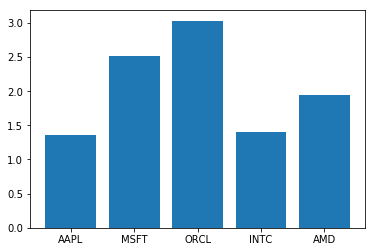

In [42]:
# Current Ratio Chart
#def current_ratio():
x= all_company_df_final.iloc[:,0]
y = all_company_df_final.iloc[:,2]
    #low = min(all_company_df_final.iloc[:,2])
    #high = max(all_company_df_final.iloc[:,2])
    #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
plt.bar(x,y)

<BarContainer object of 5 artists>

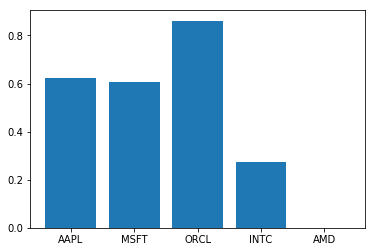

In [43]:
# Debt to Capitalization Ratio Chart
#def debt_to_cap():
x= all_company_df_final.iloc[:,0]
y = all_company_df_final.iloc[:,3]
    #low = min(all_company_df_final.iloc[:,3])
    #high = max(all_company_df_final.iloc[:,3])
    #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
plt.bar(x,y)

<BarContainer object of 5 artists>

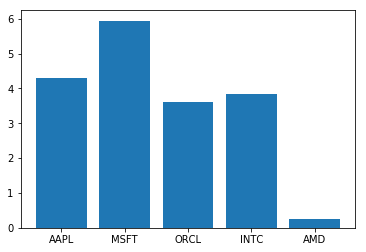

In [44]:
# Free cash flow per share Chart
#def free_cashflow():
x= all_company_df_final.iloc[:,0]
y = all_company_df_final.iloc[:,4]
    #low = min(all_company_df_final.iloc[:,4])
    #high = max(all_company_df_final.iloc[:,4])
    #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
plt.bar(x,y)

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Str(BarContainer)
    [1] Column
        [0] Markdown(str)
        [1] Str(BarContainer)
        [2] Str(BarContainer)
    [2] Column
        [0] Markdown(str)
        [1] Str(BarContainer)

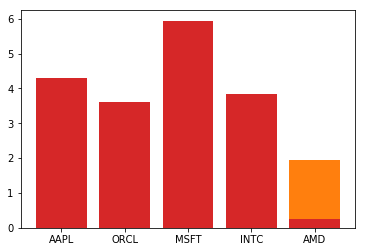

In [23]:
column_Operations = pn.Column(
    '# Operational Efficiency based KPIs',
    net_profitMargin()
)

column_financialstability = pn.Column(
    '# Financial Stability based KPIs',
    current_ratio(),
    debt_to_cap()
)

column_cashflow = pn.Column(
    '# Cash FLow based KPIs',
    free_cashflow()
)

tabs = pn.Tabs(
    ("Operational Metrics", column_Operations),
    ("Financial Stability Metrics", column_financialstability),
    ("Cash Flow metrics", column_cashflow)
)
tabs